# Keras for Simple Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Necessary Imports

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
print(tf.__version__)

2.13.0


Importing the file into **pandas** dataframe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cases/Wisconsin/BreastCancer.csv")
df.head()

Code  Clump  UniCell_Size  Uni_CellShape  MargAdh  SEpith  BareN  \
0   61634      5             4              3        1       2      2   
1   63375      9             1              2        6       4     10   
2   76389     10             4              7        2       2      8   
3   95719      6            10             10       10       8     10   
4  128059      1             1              1        1       2      5   

   BChromatin  NoemN  Mitoses      Class  
0           2      3        1     Benign  
1           7      7        2  Malignant  
2           6      1        1  Malignant  
3           7     10        7  Malignant  
4           5      1        1     Benign

For the column **Class** which is a response variable, the hot encoding / dummying needs to be done.

In [ ]:
dum_df = pd.get_dummies(df)
dum_df.drop(['Class_Benign'],axis="columns",inplace = True)
dum_df.head()

Code  Clump  UniCell_Size  Uni_CellShape  MargAdh  SEpith  BareN  \
0   61634      5             4              3        1       2      2   
1   63375      9             1              2        6       4     10   
2   76389     10             4              7        2       2      8   
3   95719      6            10             10       10       8     10   
4  128059      1             1              1        1       2      5   

   BChromatin  NoemN  Mitoses  Class_Malignant  
0           2      3        1                0  
1           7      7        2                1  
2           6      1        1                1  
3           7     10        7                1  
4           5      1        1                0

In [ ]:
dum_df.shape

(699, 11)

We now create two separate objects for feature variables **X** and output variable **y**

In [ ]:
X = dum_df.iloc[:,1:10]
y = dum_df.iloc[:,10]

In [ ]:
X.head()

Clump  UniCell_Size  Uni_CellShape  MargAdh  SEpith  BareN  BChromatin  \
0      5             4              3        1       2      2           2   
1      9             1              2        6       4     10           7   
2     10             4              7        2       2      8           6   
3      6            10             10       10       8     10           7   
4      1             1              1        1       2      5           5   

   NoemN  Mitoses  
0      3        1  
1      7        2  
2      1        1  
3     10        7  
4      1        1

In [ ]:
X.shape

(699, 9)

In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Class_Malignant, dtype: uint8

We now, split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=2023,stratify=y)

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

In [ ]:
(X_trn_scl.shape, y_train.shape)

((489, 9), (489,))

Conversion of objects **y_train** and **y_test** into numpy array

In [ ]:
y_train = y_train.values
y_test = y_test.values

Let us now define the neural network through which we plan to build the MLP model

For getting reproducible results, we set random number seed and do necessary imports

**Model Definition:**

In [ ]:
tf.random.set_seed(2023)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu',input_shape=(9,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 60        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 93 (372.00 Byte)
Trainable params: 93 (372.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

**Model Fitting:**

In [ ]:
history = model.fit(X_trn_scl,y_train,validation_data=(X_tst_scl,y_test),verbose=2,epochs=500)

Epoch 1/500
16/16 - 7s - loss: 0.6876 - accuracy: 0.7485 - val_loss: 0.6851 - val_accuracy: 0.7095 - 7s/epoch - 447ms/step
Epoch 2/500
16/16 - 0s - loss: 0.6718 - accuracy: 0.7566 - val_loss: 0.6693 - val_accuracy: 0.7143 - 86ms/epoch - 5ms/step
Epoch 3/500
16/16 - 0s - loss: 0.6553 - accuracy: 0.7751 - val_loss: 0.6538 - val_accuracy: 0.7238 - 80ms/epoch - 5ms/step
Epoch 4/500
16/16 - 0s - loss: 0.6389 - accuracy: 0.7955 - val_loss: 0.6385 - val_accuracy: 0.7381 - 89ms/epoch - 6ms/step
Epoch 5/500
16/16 - 0s - loss: 0.6223 - accuracy: 0.8139 - val_loss: 0.6228 - val_accuracy: 0.7524 - 77ms/epoch - 5ms/step
Epoch 6/500
16/16 - 0s - loss: 0.6053 - accuracy: 0.8160 - val_loss: 0.6075 - val_accuracy: 0.7714 - 91ms/epoch - 6ms/step
Epoch 7/500
16/16 - 0s - loss: 0.5887 - accuracy: 0.8200 - val_loss: 0.5923 - val_accuracy: 0.7905 - 77ms/epoch - 5ms/step
Epoch 8/500
16/16 - 0s - loss: 0.5721 - accuracy: 0.8466 - val_loss: 0.5768 - val_accuracy: 0.8143 - 79ms/epoch - 5ms/step
Epoch 9/500
16/1

In [ ]:
print(model.get_weights())

[array([[-0.51536477, -0.27949038, -0.44414204,  0.3915984 , -0.5054262 ,
         0.58452904],
       [ 0.20974123, -0.6495488 ,  0.37052336, -0.28144616,  0.30253014,
         0.97359854],
       [ 0.66659874, -0.29509154, -0.18469577,  0.19000399, -0.09291132,
         0.6704922 ],
       [-0.27566037, -0.48900968, -0.33656052,  0.7451351 , -0.14902095,
         0.1035168 ],
       [-0.22568296,  0.21614613,  0.44777238, -0.32115474,  0.2057974 ,
         0.34586337],
       [ 0.80704504, -0.24671309, -0.54538137,  0.39556843,  0.36147708,
         0.90069604],
       [-0.3109106 ,  0.03512829,  0.1682108 , -0.17161481,  0.36862183,
         0.6074711 ],
       [-0.25082338,  0.02492441,  0.15892057,  0.11266758, -0.71746296,
         0.32823804],
       [-0.340956  , -0.27466345,  0.19238943,  0.6095108 , -0.6426559 ,
         0.28663307]], dtype=float32), array([ 0.00145095,  0.9596635 , -0.18250404, -0.00148543,  0.22265139,
       -0.24782558], dtype=float32), array([[-0.4660237

In [ ]:
%matplotlib inline

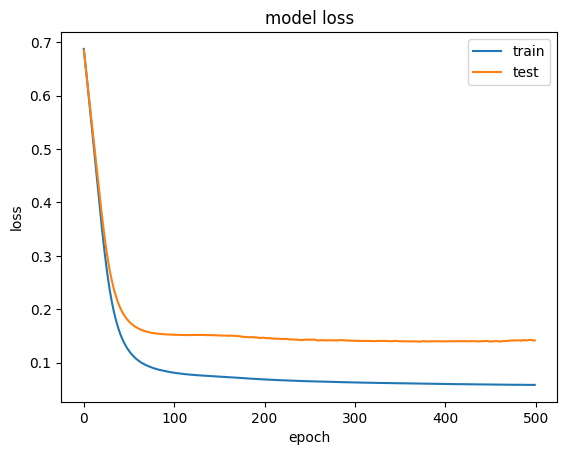

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_tst_scl)
log_loss(y_test,y_pred_prob)

7/7 [==============================] - 0s 3ms/step


0.141678084451863

In [ ]:
from sklearn.metrics import accuracy_score
predict_classes = np.where(y_pred_prob>=0.5,1,0)
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.9380952380952381


# Early Stopping

If we continue to train the network, it may overfit. We can have a stop point where the accuracy may start falling.

For getting reproducible results, we set random number seed and do necessary imports

In [ ]:
tf.random.set_seed(2023)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=15, verbose=2,
        restore_best_weights=True)
history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
16/16 - 2s - loss: 0.8377 - accuracy: 0.5112 - val_loss: 0.6768 - val_accuracy: 0.3952 - 2s/epoch - 138ms/step
Epoch 2/500
16/16 - 0s - loss: 0.6607 - accuracy: 0.4335 - val_loss: 0.6301 - val_accuracy: 0.4429 - 231ms/epoch - 14ms/step
Epoch 3/500
16/16 - 0s - loss: 0.6149 - accuracy: 0.5501 - val_loss: 0.5948 - val_accuracy: 0.5952 - 238ms/epoch - 15ms/step
Epoch 4/500
16/16 - 0s - loss: 0.5788 - accuracy: 0.7055 - val_loss: 0.5694 - val_accuracy: 0.6286 - 154ms/epoch - 10ms/step
Epoch 5/500
16/16 - 0s - loss: 0.5464 - accuracy: 0.7873 - val_loss: 0.5361 - val_accuracy: 0.8762 - 159ms/epoch - 10ms/step
Epoch 6/500
16/16 - 0s - loss: 0.5167 - accuracy: 0.8814 - val_loss: 0.5119 - val_accuracy: 0.8857 - 248ms/epoch - 15ms/step
Epoch 7/500
16/16 - 0s - loss: 0.4916 - accuracy: 0.9080 - val_loss: 0.4925 - val_accuracy: 0.8810 - 230ms/epoch - 14ms/step
Epoch 8/500
16/16 - 0s - loss: 0.4678 - accuracy: 0.9162 - val_loss: 0.4693 - val_accuracy: 0.9143 - 182ms/epoch - 11ms/step
Ep

Let us see the parameters in the early stopping involved:
- **monitor**: quantity to be monitored.<br>
- **min_delta**: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.<br>
- **patience**: number of epochs with no improvement after which training will be stopped.<br>
- **restore_best_weights**: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

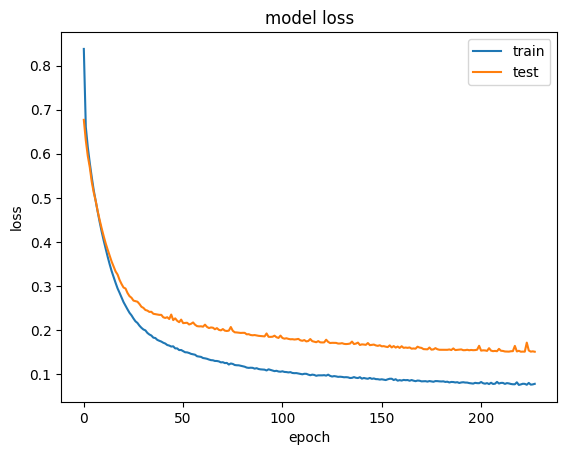

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

7/7 [==============================] - 0s 2ms/step


0.15141669940595148

In [ ]:
from sklearn.metrics import accuracy_score
predict_classes = np.where(y_pred_prob>=0.5,1,0)
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.9285714285714286
